In [11]:
#Q1
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print("Q1 Accuracy:", accuracy_score(y_test, y_pred))


Q1 Accuracy: 1.0


In [12]:
#Q2
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

print("Q2 MSE:", mean_squared_error(y_test, y_pred))



Q2 MSE: 3237.526541353384


In [3]:
#Q3

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

print("Q3 Feature Importances:")
for name, importance in zip(data.feature_names, rf_clf.feature_importances_):
    print(f"{name}: {importance:.4f}")


Q3 Feature Importances:
mean radius: 0.0323
mean texture: 0.0111
mean perimeter: 0.0601
mean area: 0.0538
mean smoothness: 0.0062
mean compactness: 0.0092
mean concavity: 0.0806
mean concave points: 0.1419
mean symmetry: 0.0033
mean fractal dimension: 0.0031
radius error: 0.0164
texture error: 0.0032
perimeter error: 0.0118
area error: 0.0295
smoothness error: 0.0059
compactness error: 0.0046
concavity error: 0.0058
concave points error: 0.0034
symmetry error: 0.0040
fractal dimension error: 0.0071
worst radius: 0.0780
worst texture: 0.0188
worst perimeter: 0.0743
worst area: 0.1182
worst smoothness: 0.0118
worst compactness: 0.0175
worst concavity: 0.0411
worst concave points: 0.1271
worst symmetry: 0.0129
worst fractal dimension: 0.0069


In [4]:
#Q4

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Q4 Decision Tree MSE:", mean_squared_error(y_test, dt_pred))
print("Q4 Random Forest MSE:", mean_squared_error(y_test, rf_pred))


Q4 Decision Tree MSE: 0.05847953216374269
Q4 Random Forest MSE: 0.034179532163742685


In [5]:
#Q5

rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train, y_train)

print("Q5 OOB Score:", rf_oob.oob_score_)


Q5 OOB Score: 0.9547738693467337


In [13]:
#Q6
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_svm = BaggingClassifier(estimator=SVC(probability=True), n_estimators=10, random_state=42)
bag_svm.fit(X_train, y_train)
y_pred = bag_svm.predict(X_test)

print("Q6 Accuracy with Bagged SVM:", accuracy_score(y_test, y_pred))


Q6 Accuracy with Bagged SVM: 1.0


In [7]:
#Q7
for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"Q7 Accuracy with {n} trees: {acc:.4f}")


Q7 Accuracy with 10 trees: 0.9649
Q7 Accuracy with 50 trees: 0.9708
Q7 Accuracy with 100 trees: 0.9708
Q7 Accuracy with 200 trees: 0.9708


In [15]:
#Q8
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_log = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=42)
bag_log.fit(X_train, y_train)
y_prob = bag_log.predict_proba(X_test)[:, 1]

print("Q8 AUC Score:", roc_auc_score(y_test, y_prob))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Q8 AUC Score: 0.9977954144620812


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
#Q9
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

print("Q9 Feature Importances (Top 10):")
for i, imp in sorted(enumerate(rf_reg.feature_importances_), key=lambda x: x[1], reverse=True)[:10]:
    print(f"Feature {i}: {imp:.4f}")


Q9 Feature Importances (Top 10):
Feature 7: 0.3876
Feature 27: 0.2291
Feature 22: 0.1214
Feature 23: 0.0586
Feature 20: 0.0419
Feature 21: 0.0297
Feature 26: 0.0216
Feature 1: 0.0181
Feature 13: 0.0155
Feature 10: 0.0094


In [16]:
#Q10

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_acc = accuracy_score(y_test, bag_model.predict(X_test))

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))

print("Q10 Bagging Accuracy:", bag_acc)
print("Q10 Random Forest Accuracy:", rf_acc)


Q10 Bagging Accuracy: 1.0
Q10 Random Forest Accuracy: 1.0


In [18]:
#Q11
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Q11 Best Params:", grid.best_params_)
print("Q11 Accuracy:", accuracy_score(y_test, grid.best_estimator_.predict(X_test)))


Q11 Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Q11 Accuracy: 0.9590643274853801


In [19]:

#Q12
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_dt = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bag_knn = BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=10, random_state=42)

bag_dt.fit(X_train, y_train)
bag_knn.fit(X_train, y_train)

print("Q12 DT MSE:", mean_squared_error(y_test, bag_dt.predict(X_test)))
print("Q12 KNN MSE:", mean_squared_error(y_test, bag_knn.predict(X_test)))




Q12 DT MSE: 3237.526541353384
Q12 KNN MSE: 3245.513215037594


In [33]:
#Q13
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities
y_proba = rf.predict_proba(X_test)[:, 1]  # Get probability of class 1

# ROC AUC
print("Q13 ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Q13 ROC-AUC Score: 0.9968400940623163


In [21]:
#Q14
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
scores = cross_val_score(bag, X, y, cv=5)

print("Q14 Cross-Validation Accuracy:", scores.mean())


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Q14 Cross-Validation Accuracy: 0.00449438202247191


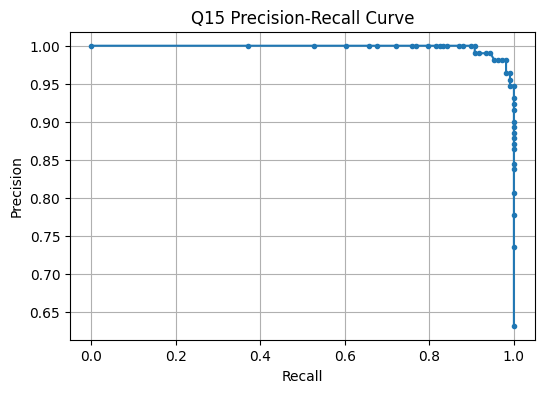

In [34]:
#Q15

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Already trained Random Forest (from Q13)
y_scores = rf.predict_proba(X_test)[:, 1]

# Compute curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.title("Q15 Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()




In [23]:
#Q16
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stack = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('lr', LogisticRegression(max_iter=1000))
    ],
    final_estimator=LogisticRegression()
)

stack.fit(X_train, y_train)
print("Q16 Stacking Accuracy:", accuracy_score(y_test, stack.predict(X_test)))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in training fold (175) does not match total number of classes (192). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in training fold (164) does not match total number of classes (192). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in trainin

Q16 Stacking Accuracy: 0.007518796992481203


In [24]:
#Q17

bag1 = BaggingRegressor(bootstrap=True, random_state=42)
bag2 = BaggingRegressor(bootstrap=False, random_state=42)

bag1.fit(X_train, y_train)
bag2.fit(X_train, y_train)

print("Q17 MSE with Bootstrap=True:", mean_squared_error(y_test, bag1.predict(X_test)))
print("Q17 MSE with Bootstrap=False:", mean_squared_error(y_test, bag2.predict(X_test)))


Q17 MSE with Bootstrap=True: 3237.526541353384
Q17 MSE with Bootstrap=False: 5139.487969924811


In [35]:
#Q18

import pandas as pd
import numpy as np

# Already trained RF on breast cancer dataset
feature_names = load_breast_cancer().feature_names
importances = rf.feature_importances_

# Create and display sorted Series
importance_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Q18 Top 5 Important Features:\n", importance_series.head(5))


Q18 Top 5 Important Features:
 mean concave points     0.141934
worst concave points    0.127136
worst area              0.118217
mean concavity          0.080557
worst radius            0.077975
dtype: float64


In [36]:
#Q19

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Train model
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bag.fit(X_train, y_train)

# Predict
y_pred = bag.predict(X_test)

# Metrics
print("Q19 Precision:", precision_score(y_test, y_pred))
print("Q19 Recall:", recall_score(y_test, y_pred))
print("Q19 F1 Score:", f1_score(y_test, y_pred))


Q19 Precision: 0.9626168224299065
Q19 Recall: 0.9537037037037037
Q19 F1 Score: 0.958139534883721


In [27]:
#Q20

for depth in [2, 4, 6, 8, None]:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    print(f"Q20 Max Depth={depth} Accuracy:", rf.score(X_test, y_test))


Q20 Max Depth=2 Accuracy: 0.0
Q20 Max Depth=4 Accuracy: 0.0
Q20 Max Depth=6 Accuracy: 0.0
Q20 Max Depth=8 Accuracy: 0.0
Q20 Max Depth=None Accuracy: 0.007518796992481203


In [28]:
#Q21

dt = DecisionTreeClassifier(random_state=42)
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

dt.fit(X_train, y_train)
bag.fit(X_train, y_train)

print("Q21 DT Accuracy:", dt.score(X_test, y_test))
print("Q21 Bagging Accuracy:", bag.score(X_test, y_test))


Q21 DT Accuracy: 0.022556390977443608
Q21 Bagging Accuracy: 0.0


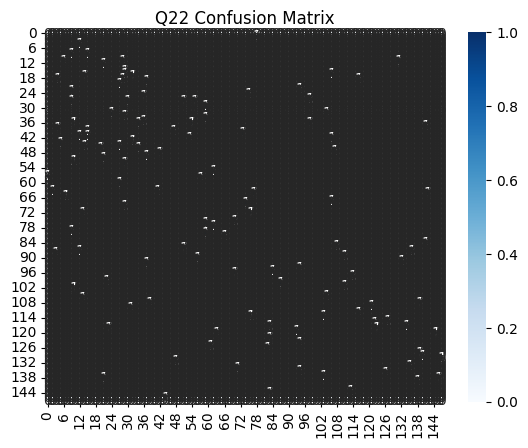

In [29]:
#Q22

from sklearn.metrics import confusion_matrix
import seaborn as sns

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

cm = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Q22 Confusion Matrix")
plt.show()


In [30]:
#Q23

from sklearn.svm import SVC

stack = StackingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier()),
        ('svm', SVC(probability=True)),
        ('lr', LogisticRegression(max_iter=1000))
    ],
    final_estimator=LogisticRegression()
)

stack.fit(X_train, y_train)
print("Q23 Stacking Accuracy:", stack.score(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in training fold (175) does not match total number of classes (192). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in training fold (164) does not match total number of classes (192). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in trainin

Q23 Stacking Accuracy: 0.007518796992481203


In [31]:
#Q24

y_pred = rf.predict(X_test)
misclassified = X_test[y_pred != y_test]
print("Q24 Number of Misclassified Samples:", len(misclassified))


Q24 Number of Misclassified Samples: 132


In [32]:
#Q25

for n in [5, 10, 50, 100]:
    bag = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    bag.fit(X_train, y_train)
    print(f"Q25 n_estimators={n} MSE:", mean_squared_error(y_test, bag.predict(X_test)))


Q25 n_estimators=5 MSE: 3366.720300751879
Q25 n_estimators=10 MSE: 3237.526541353384
Q25 n_estimators=50 MSE: 2987.0073593984966
Q25 n_estimators=100 MSE: 2908.80615037594
